In [9]:
import numpy as np
import pandas as pd

In [10]:
foods= pd.read_csv('food.csv')
users= pd.read_csv('users.csv')
ratings= pd.read_csv('ratings.csv')

In [11]:
foods.head()

,food_id,name,price
0,1,Garden Salad,185
1,2,Russian Salad,225
2,3,Fruit Salad,325
3,4,Mushroom Soup,195
4,5,Veg soup,185


In [12]:
users.head()

,Users,Age
0,1,22
1,2,57
2,3,61
3,4,31
4,5,65


In [13]:
ratings.head()

,Users,food_id,name,rating
0,1,9,Corn salt & pepper,3
1,2,5,Veg soup,7
2,2,18,Paneer Chilly,8
3,3,37,Wings Platter,6
4,4,4,Mushroom Soup,9


In [14]:
print(foods.shape)
print(users.shape)
print(ratings.shape)

(61, 3)
(800, 2)
(1604, 4)


In [15]:
users.isnull().sum()

Users    0
Age      0
dtype: int64

In [16]:
foods.isnull().sum()

food_id    0
name       0
price      0
dtype: int64

In [17]:
ratings.isnull().sum()

Users      0
food_id    0
name       0
rating     0
dtype: int64

In [18]:
print(foods.duplicated().sum())
print(users.duplicated().sum())
print(ratings.duplicated().sum())

0
0
0


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary Statistics

In [20]:
foods_summary = foods.describe()
users_summary = users.describe()
ratings_summary = ratings.describe()

# Data Visualization

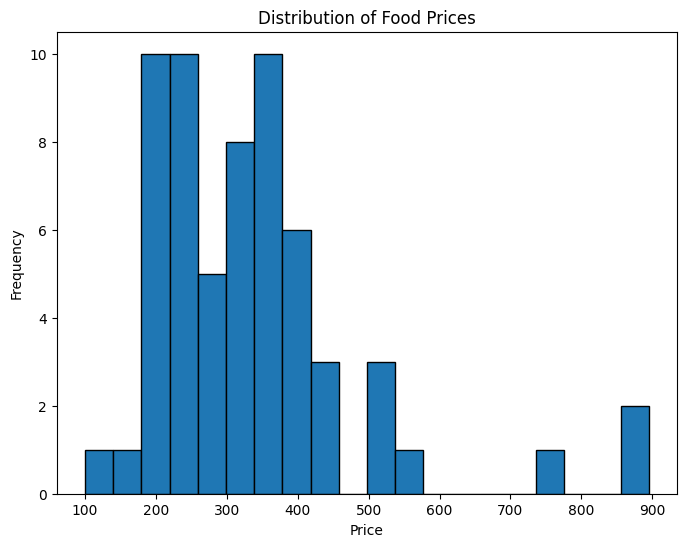

In [21]:
plt.figure(figsize=(8, 6))
plt.hist(foods['price'], bins=20, edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Food Prices')
plt.show()

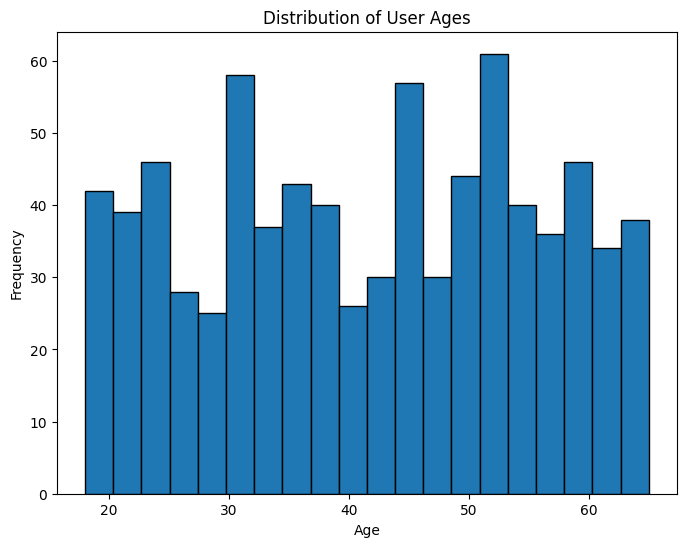

In [22]:
plt.figure(figsize=(8, 6))
plt.hist(users['Age'], bins=20, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of User Ages')
plt.show()

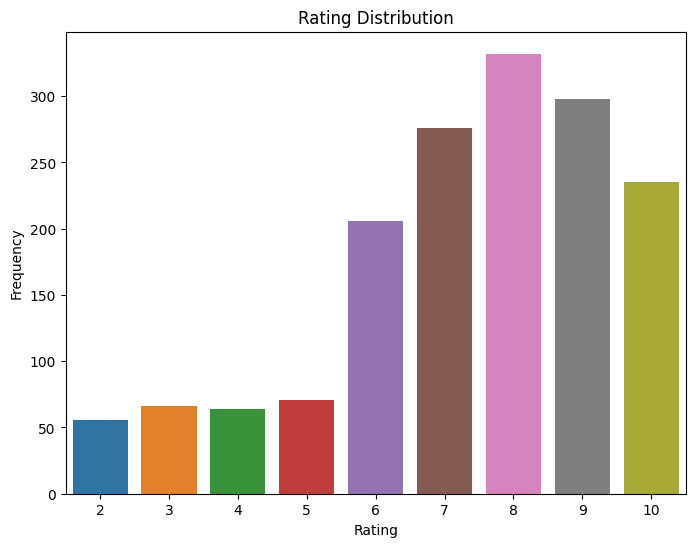

In [23]:
plt.figure(figsize=(8, 6))
sns.countplot(x='rating', data=ratings)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Rating Distribution')
plt.show()

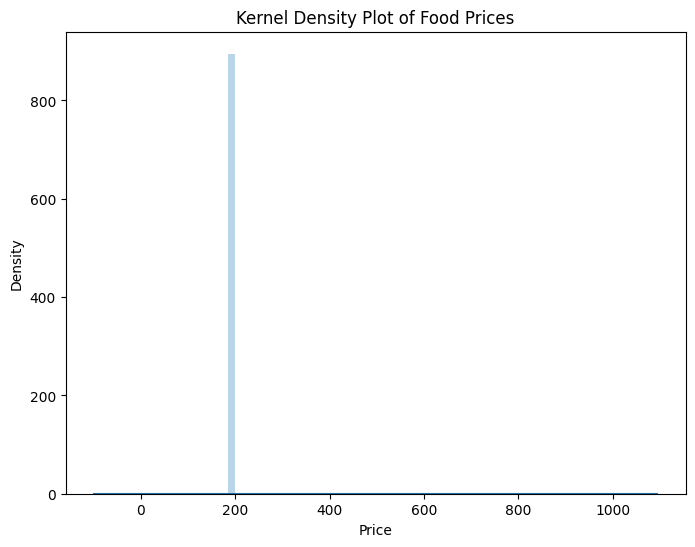

In [24]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data=foods['price'])
plt.fill_between(foods['price'], 0, foods['price'].max(), alpha=0.3)
plt.xlabel('Price')
plt.ylabel('Density')
plt.title('Kernel Density Plot of Food Prices')
plt.show()

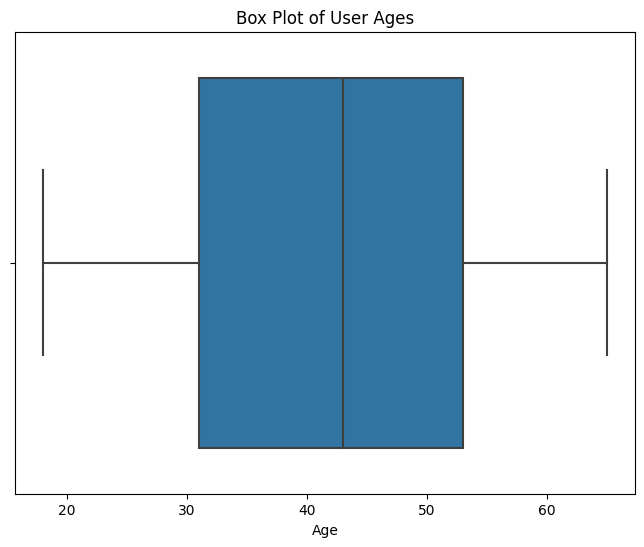

In [25]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=users['Age'])
plt.xlabel('Age')
plt.title('Box Plot of User Ages')
plt.show()

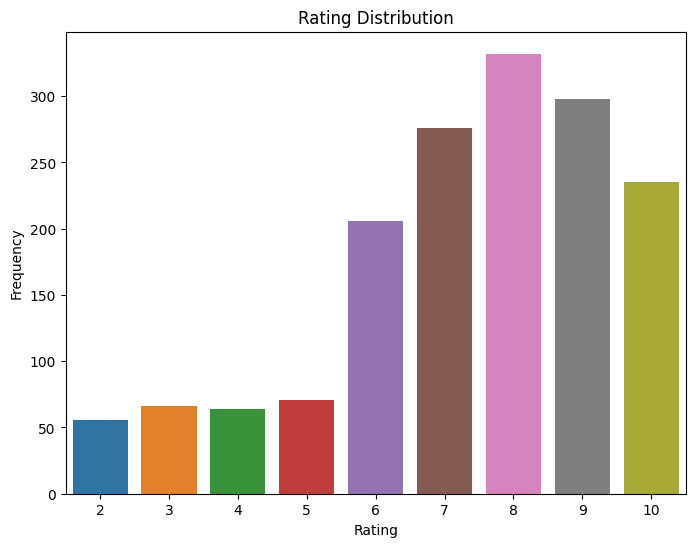

In [26]:
plt.figure(figsize=(8, 6))
sns.countplot(x='rating', data=ratings)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Rating Distribution')
plt.show()

In [27]:
import warnings

In [35]:
top_rated_foods = ratings.groupby(['food_id', 'name'])['rating'].mean().reset_index()
top_rated_foods = top_rated_foods.sort_values(by='rating', ascending=False)
top_rated_foods =  top_rated_foods.merge(foods[['food_id', 'price']], on='food_id', how='left')

print("Top-Rated Foods:")
print(top_rated_foods.head(10))

Top-Rated Foods:
   food_id               name    rating  price
0       46           Veg Momo  8.320000    235
1       16        Paneer tawa  8.161290    375
2       27      Mutton Choila  8.153846    515
3       48      Veg jhol Momo  8.142857    285
4       52   Chicken fry Momo  8.000000    315
5       47       Veg fry Momo  8.000000    245
6       50       Chicken Momo  8.000000    275
7       49         Veg c-Momo  7.962963    295
8       60    Chicken Biryani  7.888889    320
9       24  Spicy Garlic Wing  7.869565    375


In [36]:
merged_data = ratings.merge(users, on='Users', how='left').merge(foods, on='food_id', how='left')
print("Merged Data:")
print(merged_data.head())

Merged Data:
   Users  food_id              name_x  rating  Age              name_y  price
0      1        9  Corn salt & pepper       3   22  Corn salt & pepper    245
1      2        5            Veg soup       7   57            Veg soup    185
2      2       18       Paneer Chilly       8   57       Paneer Chilly    345
3      3       37       Wings Platter       6   61       Wings Platter    895
4      4        4       Mushroom Soup       9   31       Mushroom Soup    195


In [ ]:
average_price_per_food = foods.groupby(['food_id', 'name'])['price'].mean().reset_index()
print("Average Price per Food:")
print(average_price_per_food)

In [ ]:
# Average Price per Food (Bar Plot)
average_price_per_food = foods.groupby(['food_id', 'name'])['price'].mean().reset_index()
average_price_per_food = average_price_per_food.sort_values(by='price', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='price', y='name', data=average_price_per_food, palette='coolwarm')
plt.xlabel('Average Price')
plt.ylabel('Food Name')
plt.title('Average Price per Food')
plt.show()

## Most Popular food

In [54]:
top_rated_foods = ratings.groupby(['food_id', 'name'])['rating'].mean().reset_index()
top_rated_foods = top_rated_foods.sort_values(by='rating', ascending=False).head(10)
top_rated_foods_with_prices = top_rated_foods.merge(foods[['food_id', 'price']], on='food_id', how='left')

In [57]:
top_rated_foods_with_prices

,food_id,name,rating,price
0,46,Veg Momo,8.320000,235
1,16,Paneer tawa,8.161290,375
2,27,Mutton Choila,8.153846,515
3,48,Veg jhol Momo,8.142857,285
4,52,Chicken fry Momo,8.000000,315
5,47,Veg fry Momo,8.000000,245
6,50,Chicken Momo,8.000000,275
7,49,Veg c-Momo,7.962963,295
8,60,Chicken Biryani,7.888889,320
9,24,Spicy Garlic Wing,7.869565,375


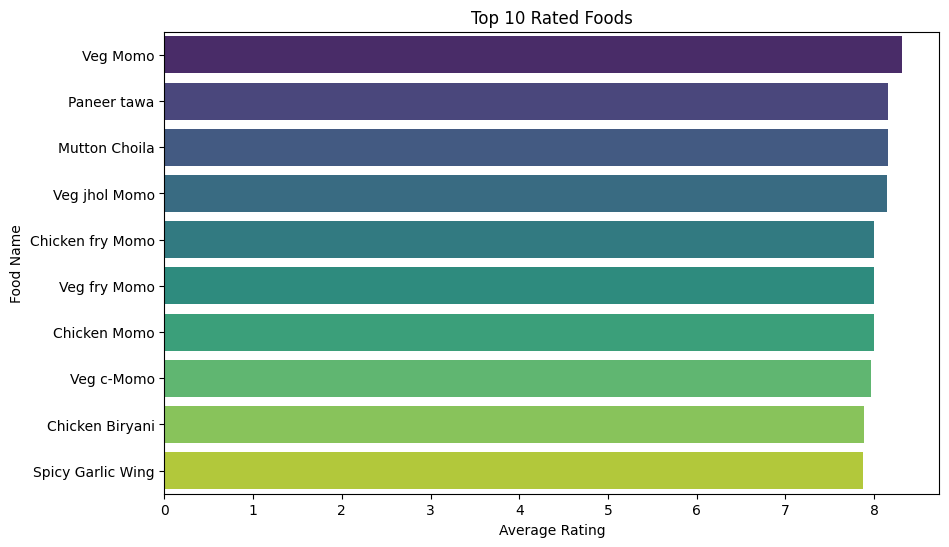

In [38]:
plt.figure(figsize=(10, 6))
sns.barplot(x='rating', y='name', data=top_rated_foods, palette='viridis')
plt.xlabel('Average Rating')
plt.ylabel('Food Name')
plt.title('Top 10 Rated Foods')
plt.show()

## Collaborative Filtering Based Recommendation System

In [39]:
x= ratings.groupby('Users').count()['rating']>0
food_reveiwers = x[x].index

In [40]:
filtered_rating = ratings[ratings['Users'].isin(food_reveiwers)]

In [41]:
y = filtered_rating.groupby('name').count()['rating']>=5
famous_foods= y[y].index

In [42]:
final_ratings = filtered_rating[filtered_rating['name'].isin(famous_foods)]

In [43]:
final_ratings.drop_duplicates()

,Users,food_id,name,rating
0,1,9,Corn salt & pepper,3
1,2,5,Veg soup,7
2,2,18,Paneer Chilly,8
3,3,37,Wings Platter,6
4,4,4,Mushroom Soup,9
...,...,...,...,...
1599,798,37,Wings Platter,9
1600,799,1,Garden Salad,8
1601,800,59,Chicken Fried Rice,2
1602,800,38,Chicken Sekuwa,8


In [44]:
final_ratings= final_ratings.merge(foods[['food_id', 'price']], on='food_id', how='left')

In [45]:
pt = final_ratings.pivot_table(index= 'name',columns = 'Users', values ='rating')

In [46]:
pt.fillna(0,inplace=True)

In [47]:
pt

Users,1,2,3,4,5,6,7,8,9,10,...,791,792,793,794,795,796,797,798,799,800
name,,,,,,,,,,,,,,,,,,,,,
Bengoli Chicken,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Bhatmas Sadheko,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Chicken Biryani,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Chicken Bulgogi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Chicken Butter Masala,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Veg fry Momo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Veg jhol Momo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,6.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0
Veg pakoda,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
import sklearn
from sklearn.metrics.pairwise import cosine_similarity

In [49]:
similarity_scores = cosine_similarity(pt)

In [75]:
def recommend(name):
    index = np.where(pt.index==name)[0][0]
    similar_items = sorted(list(enumerate(similarity_scores[index])),key= lambda x:x[1], reverse = True)[1:6]
    
    data= []
    
    for i in similar_items:
        item = []
        temp_df = foods[foods['name'] == pt.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('name')['name'].values))
        item.extend(list(temp_df.drop_duplicates('name')['price'].values))
          
        data.append(item)
        
    return data

In [76]:
recommend('Chicken fry Momo')

[['Bengoli Chicken', 435],
 ['Mix Fried Rice', 260],
 ['Chicken Chilly', 345],
 ['Veg pakoda', 195],
 ['Peanut Sadheko', 185]]

In [58]:
import pickle
pickle.dump(top_rated_foods_with_prices,open('popularwp.pkl','wb'))


In [53]:
print(top_rated_foods)

    food_id               name    rating
45       46           Veg Momo  8.320000
15       16        Paneer tawa  8.161290
26       27      Mutton Choila  8.153846
47       48      Veg jhol Momo  8.142857
51       52   Chicken fry Momo  8.000000
46       47       Veg fry Momo  8.000000
49       50       Chicken Momo  8.000000
48       49         Veg c-Momo  7.962963
59       60    Chicken Biryani  7.888889
23       24  Spicy Garlic Wing  7.869565


In [77]:
pickle.dump(pt,open('pt.pkl','wb'))
pickle.dump(foods,open('foods.pkl','wb'))
pickle.dump(similarity_scores,open('similarity_scores.pkl','wb'))